In [38]:
import pickle 
path = 'results/final_computation_graphs/result_4.pkl'
with open(path, 'rb') as f:
    result = pickle.load(f)

In [39]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-30B-A3B-Instruct-2507")

In [40]:
def count_num_tokens(text, tokenizer):
    tokens = tokenizer.encode(text)
    num_tokens = len(tokens)
    return num_tokens

In [41]:
metrics = []
for doc, charges in result.items():
    for charge in charges.keys():
        # print(result[doc][charge][charge].keys())
        if result[doc][charge][charge]['status'] != 'SUCCESS':
            print(result[doc][charge][charge])
        else:
            t2 = count_num_tokens(str(result[doc][charge][charge]['thought2']), tokenizer)
            t3 = count_num_tokens(str(result[doc][charge][charge]['thought3']), tokenizer)
            t4 = count_num_tokens(str(result[doc][charge][charge]['thought4']), tokenizer)
            exec_time = result[doc][charge][charge]['execution_time']
            total_think_tokens = t2 + t3 + t4
            metrics.append((total_think_tokens, exec_time))

In [42]:
metrics

[(909, 33.88983999704942),
 (489, 13.643314076121897),
 (693, 12.463999124243855),
 (560, 17.741259520873427),
 (610, 16.82510179001838),
 (1125, 60.09094561031088),
 (812, 51.50459625804797),
 (757, 10.621148394886404),
 (576, 17.97737395297736),
 (879, 58.442942356690764),
 (794, 112.01432081218809),
 (492, 11.779831829946488),
 (738, 153.11408379208297),
 (834, 14.751108346041292),
 (1014, 16.997020696289837),
 (938, 182.58622682420537),
 (601, 15.77901067212224),
 (552, 19.684663774911314),
 (588, 18.59952596295625),
 (781, 12.830152631737292),
 (613, 17.729617801960558),
 (700, 38.80276871426031),
 (848, 13.145779537037015),
 (761, 14.540322114247829),
 (720, 12.638793376740068),
 (644, 85.42826903285459),
 (627, 16.305740918032825),
 (881, 100.19015889801085),
 (661, 11.079718965571374),
 (680, 21.757302339188755),
 (1429, 203.74292095797136),
 (588, 15.51116538187489),
 (838, 41.333391341846436),
 (741, 50.600382233038545),
 (1145, 176.69059827923775),
 (671, 21.718976622913033)

In [43]:
import pickle 
path = 'results/final_computation_graphs/result_8b_30bthink_3.pkl'
with open(path, 'rb') as f:
    result_think = pickle.load(f)

In [44]:
result_think['0']['gpu_compute_fee']['gpu_compute_fee'].keys()

dict_keys(['query', 'reasoning', 'computation_graph', 'execution_time', 'status'])

In [45]:

from transformers import AutoTokenizer
tokenizer_think = AutoTokenizer.from_pretrained("Qwen/Qwen3-30B-A3B-Thinking-2507")

In [46]:
metrics_think = []
r = result_think
t = tokenizer_think
for doc, charges in r.items():
    for charge in charges.keys():
        # print(result[doc][charge][charge].keys())
        if r[doc][charge][charge]['status'] != 'SUCCESS':
            print(r[doc][charge][charge])
        else:
            reasoning = count_num_tokens(str(r[doc][charge][charge]['reasoning']), t)
            exec_time = r[doc][charge][charge]['execution_time']
            total_think_tokens = reasoning
            metrics_think.append((total_think_tokens, exec_time))

In [47]:
metrics_think

[(5752, 358.48115283157676),
 (5211, 357.1311042988673),
 (6382, 490.7438915167004),
 (3688, 190.9680344928056),
 (3549, 111.63463876117021),
 (3764, 216.00721286330372),
 (5757, 536.5138994660228),
 (5580, 320.2909949887544),
 (5690, 300.5412667794153),
 (4019, 137.35216762218624),
 (5863, 449.0219040196389),
 (4359, 185.6232396233827),
 (5084, 313.653608256951),
 (6269, 333.31699768733233),
 (5032, 618.8955654390156),
 (6141, 538.4107150398195),
 (6329, 421.68002919573337),
 (3881, 194.52122259233147),
 (5095, 400.8731074016541),
 (6312, 309.72391651012003),
 (5414, 275.21377460844815),
 (2794, 92.55605189409107),
 (3560, 183.71154123079032),
 (3100, 146.00803098455071),
 (6498, 403.59851513803005),
 (2955, 152.35217682644725),
 (4471, 247.82066463772207),
 (6302, 407.17684447579086)]

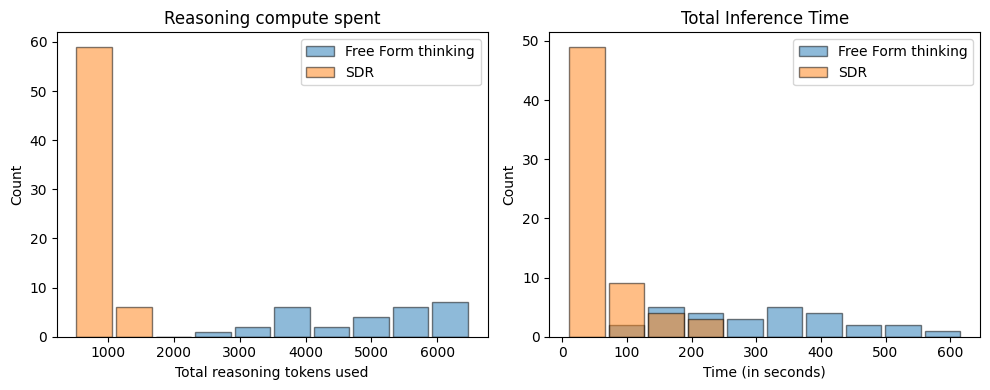

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Split columns
first_t, second_t = map(list, zip(*metrics_think))
first,   second   = map(list, zip(*metrics))

# --- Shared bin edges for the left plot (tokens) ---
lo0 = min(min(first_t), min(first))
hi0 = max(max(first_t), max(first))
edges0 = np.linspace(lo0, hi0, 11)  # 10 equal-width bins

# --- Shared bin edges for the right plot (time) ---
lo1 = min(min(second_t), min(second))
hi1 = max(max(second_t), max(second))
edges1 = np.linspace(lo1, hi1, 11)  # 10 equal-width bins

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left: reasoning tokens (shared edges)
axes[0].hist(first_t, bins=edges0, alpha=0.5, label='Free Form thinking',
             edgecolor='black', rwidth=0.9)
axes[0].hist(first,   bins=edges0, alpha=0.5, label='SDR',
             edgecolor='black', rwidth=0.9)
axes[0].set_title('Reasoning compute spent')
axes[0].set_xlabel('Total reasoning tokens used')
axes[0].set_ylabel('Count')
axes[0].legend()

# Right: total time (shared edges)
axes[1].hist(second_t, bins=edges1, alpha=0.5, label='Free Form thinking',
             edgecolor='black', rwidth=0.9)
axes[1].hist(second,   bins=edges1, alpha=0.5, label='SDR',
             edgecolor='black', rwidth=0.9)
axes[1].set_title('Total Inference Time')
axes[1].set_xlabel('Time (in seconds)')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

def df_stats(pairs):
    a, b = map(list, zip(*pairs))
    df = pd.DataFrame({'total tokens': a, 'total inference time': b})
    q = df.quantile([0.25, 0.5, 0.75]).rename(index={0.25:'q1',0.5:'q2',0.75:'q3'})
    return pd.concat([df.agg(['mean','median']), q])

print("free form thinking:\n", df_stats(metrics_think))
print("\nSDR:\n", df_stats(metrics))

free form thinking:
         total tokens  total inference time
mean     4958.964286            310.493652
median   5153.000000            311.688762
q1       3851.750000            189.631836
q2       5153.000000            311.688762
q3       5932.500000            404.493097

SDR:
         total tokens  total inference time
mean      794.415385             50.084709
median    743.000000             18.599526
q1        618.000000             14.385308
q2        743.000000             18.599526
q3        909.000000             60.090946
